# Linear Regression with Multiple Variables

In [21]:
#needed to work!
available_graphics_toolkits
graphics_toolkit('gnuplot')

ans = 
{
  [1,1] = gnuplot
}


In [22]:
clear ; close all; clc
warning ("off", "Octave:broadcast");
warning ("off", "Octave:possible-matlab-short-circuit-operator");
warning ("off", "Octave:divide-by-zero");

### Loading Data

In [23]:
%% Load Data
data = load('data/ex1data2.txt');
X = data(:, 1:2);
y = data(:, 3);
m = length(y);

In [24]:
% Print out some data points
fprintf(' x = [%.0f %.0f], y = %.0f \n', [X(1:10,:) y(1:10,:)]');

 x = [2104 3], y = 399900 
 x = [1600 3], y = 329900 
 x = [2400 3], y = 369000 
 x = [1416 2], y = 232000 
 x = [3000 4], y = 539900 
 x = [1985 4], y = 299900 
 x = [1534 3], y = 314900 
 x = [1427 3], y = 198999 
 x = [1380 3], y = 212000 
 x = [1494 3], y = 242500 


In [25]:
% Scale features and set them to zero mean
[X mu sigma] = featureNormalize(X);
% Add intercept term to X
X = [ones(m, 1) X];

## Using Gradient Descent

In [26]:
%plot -f svg
f = figure();

Inline plot failed, consider trying another graphics toolkit
error: print: no axes object in figure to print
error: called from
    _make_figures>safe_print at line 122 column 7
    _make_figures at line 44 column 13



Predicted price of a 1650 sq-ft, 3 br house  (alpha: 0.001000)(using gradient descent):$289213.606281
Predicted price of a 1650 sq-ft, 3 br house  (alpha: 0.003000)(using gradient descent):$293151.845164
Predicted price of a 1650 sq-ft, 3 br house  (alpha: 0.010000)(using gradient descent):$293081.464741
Predicted price of a 1650 sq-ft, 3 br house  (alpha: 0.030000)(using gradient descent):$293081.464335
Predicted price of a 1650 sq-ft, 3 br house  (alpha: 0.100000)(using gradient descent):$293081.464335
Predicted price of a 1650 sq-ft, 3 br house  (alpha: 0.300000)(using gradient descent):$293081.464335
Predicted price of a 1650 sq-ft, 3 br house  (alpha: 1.000000)(using gradient descent):$293081.464335


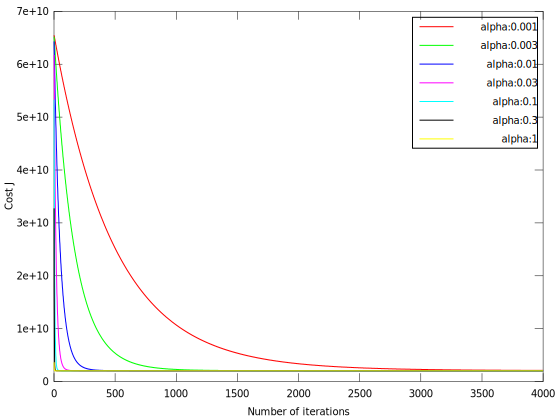

In [27]:
% Choose some alpha value
alphas = [ 0.001;  0.003;  0.01;  0.03;  0.1 ; 0.3; 1; ];
colors = [ "red"; "green"; "blue"; "magenta"; "cyan"; "brown" ; "red"; ];
colors = 'rgbmckyw'; 
num_iters = 4000;

str=[];


hold on;
for i=1:length(alphas)
    
    alpha = alphas(i,1);
    color = colors(i);
    
    theta = zeros(3, 1);
    [theta, J_history] = gradientDescentMulti(X, y, theta, alpha, num_iters);
    
    color;
    plot(1:numel(J_history), J_history, color, 'LineWidth', 1);
    
    
    _x = [   1 ,...
        ( 1650 - mu(:,1) ) / sigma(:,1),...
        ( 3    - mu(:,2) ) / sigma(:,2) ];
    price = _x*theta;
    
    printf(['Predicted price of a 1650 sq-ft, 3 br house  (alpha: %f)(using gradient descent):$%f\n'], alpha, price);
    str = [str ; strcat('alpha: ', num2str(alphas(i)))];
    
end

legend(str); %colors legend

xlabel('Number of iterations');
ylabel('Cost J');

hold off;

## Using Normal Equation

In [28]:
%% Load Data
data = csvread('data/ex1data2.txt');
X = data(:, 1:2);
y = data(:, 3);
m = length(y);

% Add intercept term to X
X = [ones(m, 1) X];

% Calculate the parameters from the normal equation
theta = normalEqn(X, y);

% Display normal equation's result
fprintf('Theta computed from the normal equations: \n');
fprintf(' %f \n', theta);
fprintf('\n');

Theta computed from the normal equations: 
 89597.909543 
 139.210674 
 -8738.019112 



### Prediction

In [29]:
price = [1 1650 3]*theta;

In [30]:
fprintf(['Predicted price of a 1650 sq-ft, 3 br house ' ...
         '(using normal equations):\n $%f\n'], price);

Predicted price of a 1650 sq-ft, 3 br house (using normal equations):
 $293081.464335
